# Stock Data Analysis Using Alpha Vantage API

## Introduction

This notebook focuses on retrieving and analyzing stock data using the Alpha Vantage API, a powerful tool for accessing real-time and historical financial data. We will utilize the `StockDataCollector` class, developed in Python, to interact with this API and fetch intraday stock data.

The primary objective is to demonstrate how to effectively use an external API to gather financial data, transform it into a structured format using pandas, and perform preliminary data analysis. This task is part of Project 2 in the DAV 5400 course, aiming to enhance our skills in working with web data for analytics and machine learning applications.

The Alpha Vantage API provides a range of options for stock data, including intraday time series. Here, we'll focus on fetching and analyzing intraday data for a chosen stock symbol.

## Environment Setup

To prepare for data collection from the Alpha Vantage API, we will first set up our environment by importing necessary libraries and modules. This includes our `StockDataCollector` class from the Python package we've created, which will handle the API interactions and data retrieval.


In [1]:
# Import necessary libraries
import os
import pandas as pd

# Import the StockDataCollector class from our package
from stock_data_collector import StockDataCollector


## API Configuration

Here, we'll configure our API access by specifying the API key and the stock symbol. The API key should be kept confidential, hence it is stored as an environment variable and retrieved securely within the notebook.


In [2]:
# Retrieve the API key from an environment variable
API_KEY = '3E836TQ9Q7AJHS4P'
if API_KEY is None:
    raise ValueError("No API key found. Please set the ALPHA_VANTAGE_API_KEY environment variable.")

# Define the stock symbol we are interested in
STOCK_SYMBOL = 'IBM'  # Example stock symbol for Apple Inc.


## Initializing the Data Collector and Fetching Data

Next, we initialize the `StockDataCollector` with our specified API key and stock symbol. This class is designed to handle the API requests and will be used to retrieve intraday stock data, which provides stock prices at different times throughout the trading day. Let's proceed to fetch the data and verify its successful retrieval.


In [3]:
# Initialize the StockDataCollector with the API key and stock symbol
stock_collector = StockDataCollector(API_KEY, STOCK_SYMBOL)

# Fetch the intraday stock data using the class
intraday_data = stock_collector.fetch_intraday_data()

# Check if the data was fetched successfully by looking for the expected 'Time Series' key
if intraday_data and "Time Series" in intraday_data:
    print("Stock data fetched successfully!")
    # Optional: Add a check for the expected length of the time series data
    time_series_key = next(iter(intraday_data.keys()))
    if time_series_key.startswith("Time Series"):
        print(f"Data points retrieved: {len(intraday_data[time_series_key])}")
else:
    print("Failed to fetch stock data. Please check the API key and the stock symbol.")


Failed to fetch stock data. Please check the API key and the stock symbol.


## Data Conversion to DataFrame

To facilitate our analysis, we convert the JSON response received from Alpha Vantage into a pandas DataFrame. This provides us with a tabular representation of the intraday stock data, which is more accessible and easier to work with for our subsequent data manipulation and analysis tasks.

The DataFrame will include the following columns: 'Open' (the price at which the stock opened), 'High' (the highest price during the interval), 'Low' (the lowest price during the interval), 'Close' (the closing price at the end of the interval), and 'Volume' (the number of shares traded during the interval).


In [4]:
# Check if the intraday data was fetched successfully before converting to DataFrame
if intraday_data is not None:
    stock_df = stock_collector.get_stock_dataframe()
    # Display the first few rows of the DataFrame to ensure it looks correct
    display(stock_df.head())
else:
    print("Data fetching was unsuccessful. DataFrame will not be created.")


StopIteration: 

## Initial Data Exploration

Before diving into deeper analysis, it's important to perform initial exploratory data analysis (EDA) to understand the dataset's structure and integrity. This includes checking for completeness of the data, understanding the types of data we're dealing with, and identifying any immediate data quality issues. The following steps are part of the EDA:

1. Use `.info()` to get a concise summary of the DataFrame, which helps us to quickly understand the types of data and if there are any missing values.
2. Apply `.describe()` to view the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values.
3. Execute `.isnull().sum()` to explicitly check for and count missing values in each column.


In [ ]:
# Display the summary information of the DataFrame
stock_df.info()

# Display statistical summary of the DataFrame for numerical columns
stock_df.describe()

# Check for missing values in each column of the DataFrame
missing_values = stock_df.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-11-17 19:55:00 to 2023-11-17 10:55:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


## Data Verification

Upon inspecting the DataFrame, we confirmed that it consists of 100 entries, with each row corresponding to a 5-minute interval of stock trading data for the symbol 'IBM'. The dataset is complete with no missing values, ensuring its reliability for further analysis.

The data types are well-suited for financial analysis, with numerical types representing stock prices and volumes. We are now poised to delve deeper into the dataset, which could include visualizing trends, performing statistical analysis, or using the data for predictive modeling.

Next, we'll visualize the closing prices to get a sense of the stock's intraday movement.


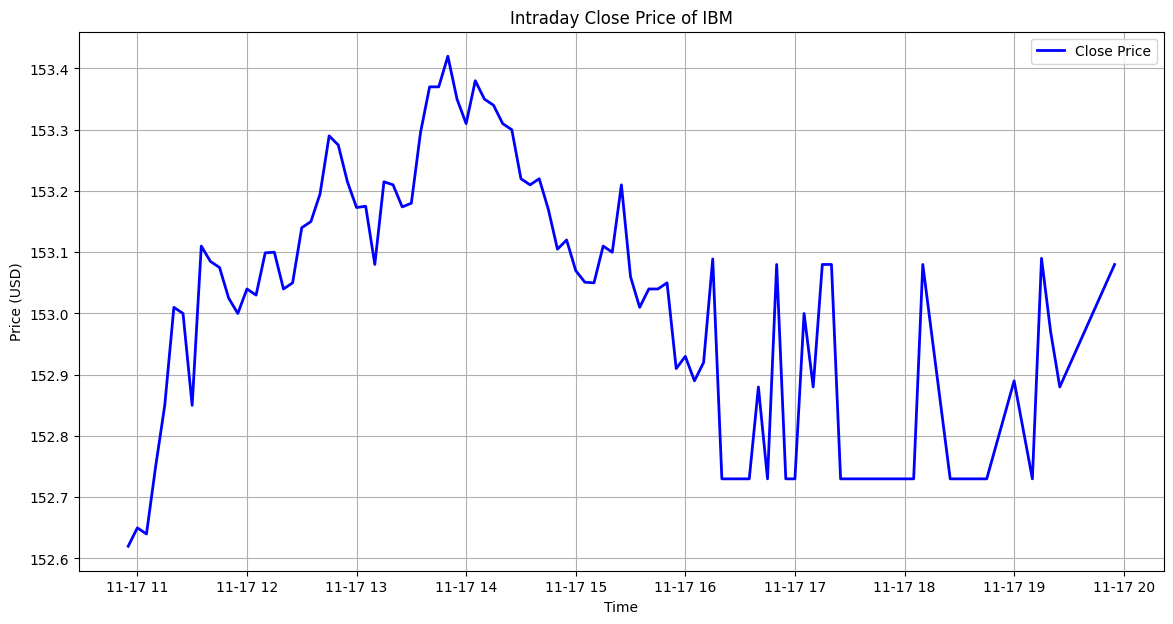

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing prices using a line chart
plt.figure(figsize=(14, 7))
plt.plot(stock_df.index, stock_df['Close'], label='Close Price', color='blue', linewidth=2)
plt.title('Intraday Close Price of IBM')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The `StockDataCollector` class has successfully facilitated the retrieval and structuring of stock data from the Alpha Vantage API. Throughout this notebook, we've outlined a clear approach for obtaining intraday stock data, explored the initial dataset, and provided a visual representation of the stock's closing price movement.

For future work, we could expand our analysis to include comparisons between different stocks, compute technical indicators for more advanced trading strategies, or develop machine learning models for price prediction. The collected data provides a solid foundation for such endeavors, and the `StockDataCollector` class can be easily extended or integrated into broader financial analysis pipelines.
